In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
da = xr.open_dataarray('../data/test.nc')

In [3]:
da

<xarray.DataArray 'dis' (step: 28, stations: 114)>
array([[4.101961e+00, 4.100822e+00, 3.061627e-01, ..., 1.426146e-02,
        2.874202e+02, 8.007029e-02],
       [4.098924e+00, 4.099454e+00, 2.888695e-01, ..., 1.425983e-02,
        2.833212e+02, 7.917784e-02],
       [4.089766e+00, 4.090903e+00, 2.733432e-01, ..., 1.254626e-02,
        2.792852e+02, 7.817290e-02],
       ...,
       [4.014198e+00, 4.014608e+00, 1.358787e-01, ..., 7.504131e-04,
        2.243310e+02, 5.573867e-02],
       [4.010608e+00, 4.011066e+00, 1.353914e-01, ..., 6.862278e-04,
        2.229379e+02, 5.499524e-02],
       [4.007336e+00, 4.007750e+00, 1.350597e-01, ..., 6.270963e-04,
        2.215474e+02, 5.429697e-02]], dtype=float32)
Coordinates:
  * stations  (stations) object '2850' '4555' '4620' ... '4584' '606' '2123'
Dimensions without coordinates: step

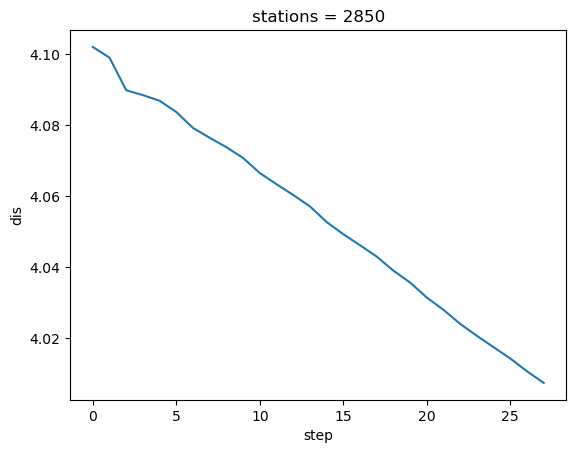

In [4]:
da.sel(stations='2850').plot()

## Forecast

### COSMO-LEPS

(20, 22, 2371)
('member', 'time', 'stations')
<xarray.DataArray 'member' (member: 20)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)
Dimensions without coordinates: member
<xarray.DataArray 'stations' (stations: 2371)>
array(['1077', '1019', '2592', ..., '1688', '1690', '2274'], dtype=object)
Coordinates:
  * stations  (stations) object '1077' '1019' '2592' ... '1688' '1690' '2274'


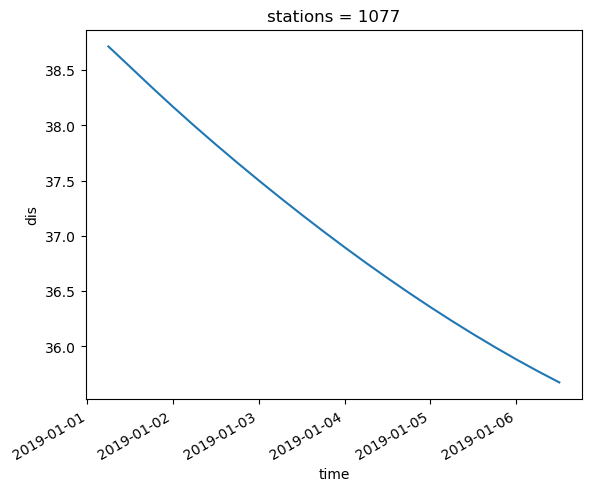

In [9]:
ds = xr.open_dataarray('../data/CDS/forecast/COS2019010100_new_stations.nc')

print(ds.shape)
print(ds.dims)
#print(ds.coords)
print(ds.member)
print(ds.stations)

ds.sel(member=0, stations='1077').plot();

### DWD

In [26]:
ds = xr.open_dataarray('../data/CDS/forecast/DWD2019010100_new_stations.nc')

print(ds.shape)

(28, 2371)


In [27]:
print(ds.dims)
#print(ds.coords)
print(ds.stations)

('time', 'stations')
<xarray.DataArray 'stations' (stations: 2371)>
array(['1077', '1019', '2592', ..., '1688', '1690', '2274'], dtype=object)
Coordinates:
  * stations  (stations) object '1077' '1019' '2592' ... '1688' '1690' '2274'


In [28]:
ds.sel(stations='1077').plot();

In [29]:
nc_points = np.sort([int(stn) for stn in ds.stations.data])

## Reporting points

In [30]:
points = pd.read_csv('../data/Station_over_500km2.csv', index_col='station_id')
# mask = points['DrainingArea.km2.LDD'] >= 500
# points = points.loc[mask,:]

In [31]:
points.shape

(2371, 3)

In [32]:
missing = list(set(points.index) - set(points.index).intersection(nc_points))
missing.sort()
len(missing)

0

In [34]:
missing = points.loc[missing, ['StationName', 'LisfloodX', 'LisfloodY', 'Country code', 'DrainingArea.km2.LDD']]

KeyError: "['Country code', 'DrainingArea.km2.LDD'] not in index"

In [ ]:
missing.to_csv('../data/missing_points.csv')